In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [171]:
# Import data from csv.
df = pd.read_csv('./Data1.csv', encoding="ansi")
df.head()

,Unnamed: 0,Company name,Gearing (%)\n2018,BvD Independence Indicator,Number of employees\n2018,Profit (Loss) before Taxation\nth GBP 2018,Tangible Assets\nth GBP 2018,Fixed Assets\nth GBP 2018
0,1,PARK CAMERAS GROUP LIMITED,17.67,D,68,"1,624","2,340","2,340"
1,2,THAMES VALLEY HOUSING ASSOCIATION LIMITED,114.04,A-,259,"33,817","71,818","1,317,990"
2,3,EIRGRID INTERCONNECTOR DESIGNATED ACTIVITY COM...,165.66,D,4,"-6,539","426,724","426,724"
3,4,AXALTA COATING SYSTEMS HUTHWAITE UK LIMITED,35.61,D,76,"1,290","2,996","3,035"
4,5,PNMSOFT UK LIMITED,985.14,D,27,207,14,14


In [172]:
# Renaming columns.
df.rename(columns={
    "Unnamed: 0": "id", 
    "Gearing (%)\n2018": "Gearing %", 
    "BvD Independence Indicator": "Independence",
    "Number of employees\n2018": "Number of Employees",
    "Profit (Loss) before Taxation\nth GBP 2018": "Profit before Tax",
    "Tangible Assets\nth GBP 2018": "Tangible Assets",
    "Fixed Assets\nth GBP 2018": "Fixed Assets"
    }, 
    inplace=True)

# Set index to id.
df.set_index('id', inplace=True)

# Replace weird null values with native numpy NaN.
df.replace(to_replace="n.a.", value=np.nan, inplace=True)
df.replace(to_replace="n.s.", value=np.nan, inplace=True)

# Drop rows with missing values.
df.dropna(inplace=True)
df.isna().sum()

Company name           0
Gearing %              0
Independence           0
Number of Employees    0
Profit before Tax      0
Tangible Assets        0
Fixed Assets           0
dtype: int64

In [173]:
# Get rid of commas in columns with numbers.
cols = ["Gearing %", "Number of Employees", "Profit before Tax", "Tangible Assets", "Fixed Assets"]
for col in cols:
    df[col] = df[col].str.replace(',', '')

# Convert columns to numeric datatypes.
df["Gearing %"] = pd.to_numeric(df["Gearing %"], errors="raise", downcast="float").round(2)
df["Number of Employees"] = pd.to_numeric(df["Number of Employees"], errors="coerce", downcast="integer")
df["Profit before Tax"] = pd.to_numeric(df["Profit before Tax"], errors="coerce", downcast="float").round(2)
df["Tangible Assets"] = pd.to_numeric(df["Tangible Assets"], errors="coerce", downcast="integer")
df["Fixed Assets"] = pd.to_numeric(df["Fixed Assets"], errors="coerce", downcast="integer")

# Label encode columns with categorical data.
# map independence column with new values.
df["Independence"] = df["Independence"].map({"A+": 10, "A": 9, "A-": 8, "B+": 7, "B": 6, "B-": 5, "C+": 4, "C": 3, "C-": 2, "D": 1, "U": 0})

# Check for missing values resulting from conversion.
df.isna().sum()

Company name           0
Gearing %              0
Independence           0
Number of Employees    0
Profit before Tax      0
Tangible Assets        0
Fixed Assets           0
dtype: int64

In [198]:
df.head(10)

# Define dependent and independent variables.
Y = df["Gearing %"] # dependent variable
X_1 = df["Independence"]
X_2 = df["Number of Employees"]
X_3 = df["Profit before Tax"]
X_4 = df["Tangible Assets"]
X_5 = df["Fixed Assets"]

Independent_Variables = [X_1, X_2, X_3, X_4, X_5]

# TODO: Windorise dataframe.

<AxesSubplot:>

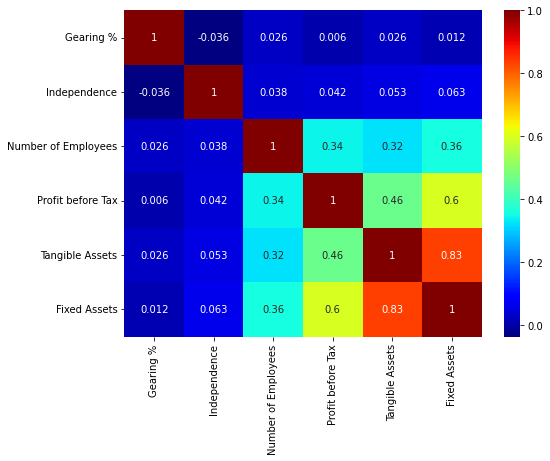

In [195]:
# Plot correlation matrix.
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap="jet")


<AxesSubplot:xlabel='Gearing %', ylabel='Count'>

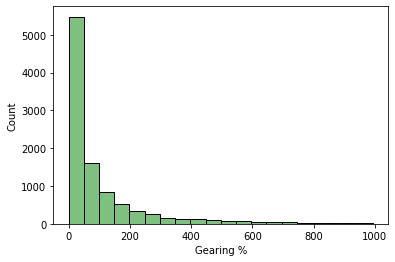

In [211]:
# Distribution of dependent variable.
sns.histplot(Y, palette="hsv", color="green", label="Gearing %", alpha=0.5, kde=False, bins=20)